In [28]:
%matplotlib inline
#%run script
import os

os.sys.path.append("..") #script path

import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt 
import defs

In [29]:
train_label_dir = '../../data/HaN_MICCAI2015_Dataset/Train_orig/'
test_label_dir = '../../data/HaN_MICCAI2015_Dataset/Test_orig/'
label_filter = 'segmentation'

train_vol_mm = dict()
test_vol_mm = dict()
vol_mm = dict()

train_vol_vx = dict()
test_vol_vx = dict()
vol_vx = dict()

def addToDict(dictionary, key, value):
    if dictionary.get(key) is None:
        dictionary[key] = [value]
    else:
        dictionary[key].append(value)
    

for f in os.listdir(train_label_dir):
    if label_filter in f:
        itk_img = sitk.ReadImage(os.path.join(train_label_dir,f), sitk.sitkUInt8)
        labelShapesFilter = sitk.LabelShapeStatisticsImageFilter()
        labelShapesFilter.Execute(itk_img)
        
        for key, value in defs.LABELS.items():
            addToDict(train_vol_mm, key, labelShapesFilter.GetPhysicalSize(value))
            addToDict(train_vol_vx, key, labelShapesFilter.GetNumberOfPixels(value))
            addToDict(vol_mm, key, labelShapesFilter.GetPhysicalSize(value))
            addToDict(vol_vx, key, labelShapesFilter.GetNumberOfPixels(value))
            
for f in os.listdir(test_label_dir):
    if label_filter in f:
        itk_img = sitk.ReadImage(os.path.join(test_label_dir,f), sitk.sitkUInt8)
        labelShapesFilter = sitk.LabelShapeStatisticsImageFilter()
        labelShapesFilter.Execute(itk_img)
        
        for key, value in defs.LABELS.items():
            addToDict(test_vol_mm, key, labelShapesFilter.GetPhysicalSize(value))
            addToDict(test_vol_mm, key, labelShapesFilter.GetNumberOfPixels(value))
            addToDict(vol_mm, key, labelShapesFilter.GetPhysicalSize(value))
            addToDict(vol_vx, key, labelShapesFilter.GetNumberOfPixels(value))

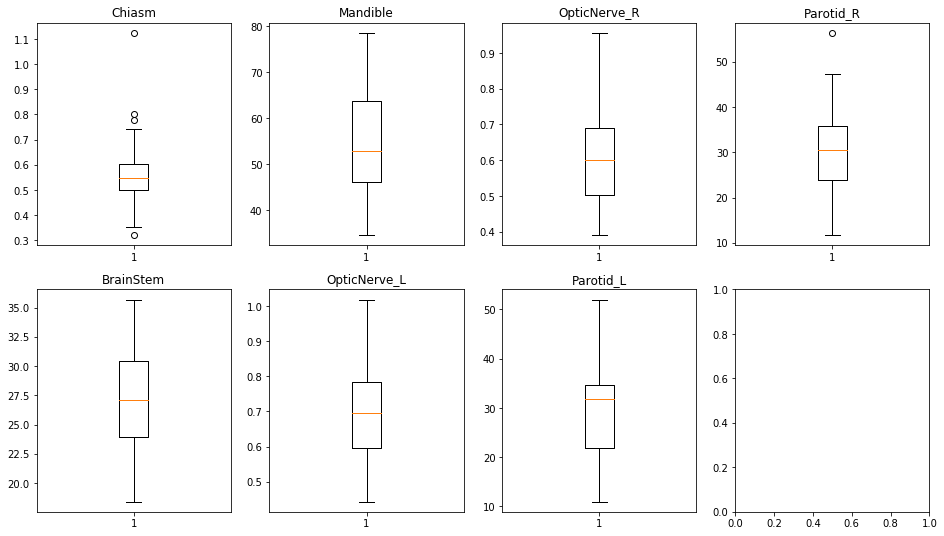

In [30]:
dictToUse = vol_mm

fig, axarr = plt.subplots(2, 4, figsize=(16,9))
axarr = axarr.ravel()
ind = 0
for key, value in defs.LABELS.items():
    axarr[ind].boxplot(np.array(dictToUse[key])/1000)
    axarr[ind].set_title(key)
    #axarr[ind].set_ylim(0, 65)
    ind += 1